In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Bug in dataset - want target = 1 to be with disease, not 0.  So swap targets
df['target'] = df['target'].apply(lambda x: 0 if x == 1 else 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## EDA

In [7]:
df['target'].value_counts()

0    165
1    138
Name: target, dtype: int64

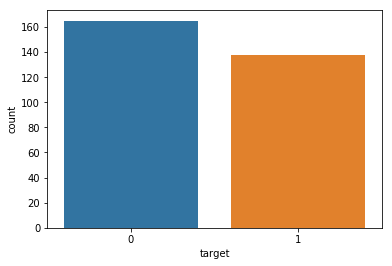

In [8]:
sns.countplot(x='target', data=df)

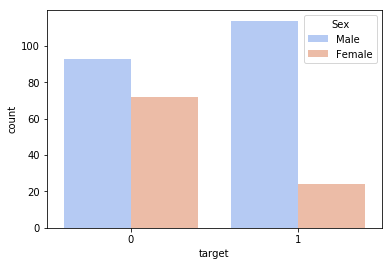

In [9]:
sns.countplot(x='target', hue='sex', data=df, hue_order=[1,0], palette='coolwarm')
plt.legend(title='Sex', labels=['Male', 'Female'])

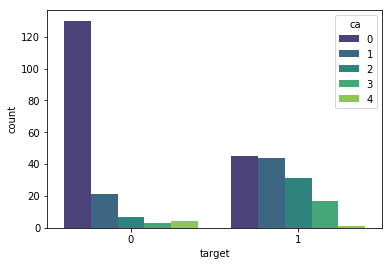

In [10]:
sns.countplot(data=df, x='target', hue='ca', palette='viridis')

   ca  target  proportion
0   0       0    0.742857
1   0       1    0.257143
2   1       1    0.676923
3   1       0    0.323077
4   2       1    0.815789
5   2       0    0.184211
6   3       1    0.850000
7   3       0    0.150000
8   4       0    0.800000
9   4       1    0.200000


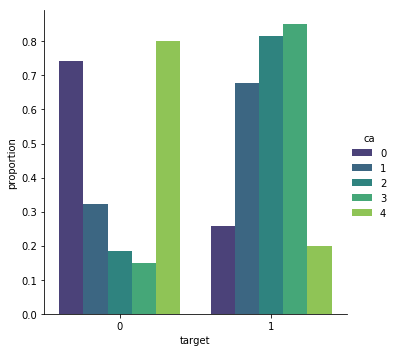

In [11]:
# redo this so normalise each ca bar by the total number of ca counts
ca_norm_data = df.groupby(by='ca')['target'].value_counts(normalize=True).rename('proportion').reset_index()
print(ca_norm_data)

# NB need to rename as otherwise called target, again, which leads to conflict
# NB reset_index converts this back to a df style, with 0-7 as the indices

sns.catplot(kind='bar', data=ca_norm_data, x='target', y='proportion', hue='ca', palette='viridis')

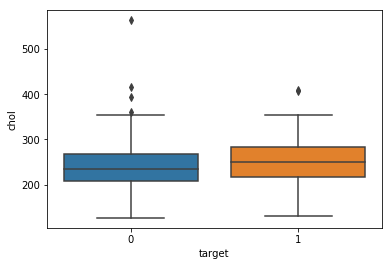

In [12]:
sns.boxplot(data=df, x='target', y='chol')

In [13]:
# check this a little more
df.groupby(by='target')['chol'].mean()

target
0    242.230303
1    251.086957
Name: chol, dtype: float64

In [14]:
# check all means grouped by target
df.groupby(by='target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212
1,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478


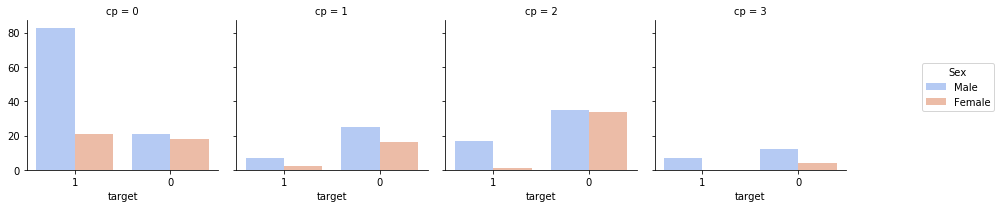

In [15]:
g = sns.FacetGrid(data=df, col='cp')
g.map(sns.countplot, 'target', hue=df['sex'], order=[1,0], hue_order=[1,0], palette='coolwarm')
plt.legend(title='Sex', labels=['Male', 'Female'], bbox_to_anchor=(0.9, 0.25, 0.9, 0.50))

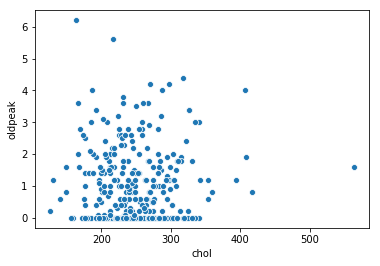

In [16]:
sns.scatterplot(x='chol', y='oldpeak', data=df)

Text(0, 0.5, 'Correlation with Target')

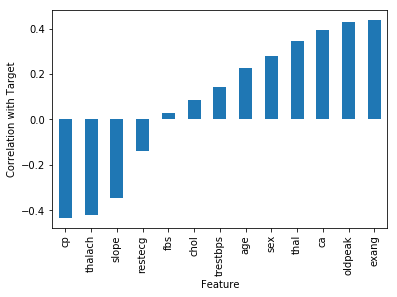

In [17]:
target_corr = df.corr()['target'].sort_values()[:-1].plot(kind='bar')
plt.xlabel("Feature")
plt.ylabel("Correlation with Target")

In [18]:
# Check which vars need one hot encoding

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [20]:
df['cp'].value_counts() # need to one hot encode as 4 vals

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [21]:
df['fbs'].value_counts() # don't need to one hot

0    258
1     45
Name: fbs, dtype: int64

In [22]:
df['restecg'].value_counts() # need to one hot as 3 vals

1    152
0    147
2      4
Name: restecg, dtype: int64

In [23]:
df['exang'].value_counts() # not needed as already onehot (two vals)

0    204
1     99
Name: exang, dtype: int64

In [24]:
df['slope'].value_counts() # need to one hot as 3 vals

2    142
1    140
0     21
Name: slope, dtype: int64

In [25]:
df['ca'].value_counts() # need to one hot as 5 vals

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [26]:
df['thal'].value_counts() # need to one hot as 4 vals

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [27]:
final_df = pd.get_dummies(data=df, columns=['cp', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)

In [28]:
#final_df = pd.concat([df.drop(columns=['cp', 'restecg', 'exang', 'slope', 'ca', 'thal']), one_hot], axis=1)

In [29]:
final_df.head()

,age,sex,trestbps,chol,fbs,thalach,oldpeak,target,cp_1,cp_2,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,2.3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,3.5,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,1.4,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0.8,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,0.6,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## Machine Learning

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('target', axis=1), final_df['target'],
                                                    test_size = 0.33, random_state=101)

### first try logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logistic_reg_model = LogisticRegression()

In [34]:
logistic_reg_model.fit(X_train, y_train)

/home/robertv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
logistic_predictions = logistic_reg_model.predict(X_test)

In [36]:
percent_correct = np.mean(logistic_predictions == y_test)*100
print(percent_correct)

88.0


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(classification_report(y_test, logistic_predictions))
print(confusion_matrix(y_test, logistic_predictions))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        52
           1       0.89      0.85      0.87        48

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

[[47  5]
 [ 7 41]]


### now try knn

In [39]:
# first standardise using standard scaler - NB not for all columns!
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

col_transformer = ColumnTransformer([
    ('scaler', StandardScaler(), ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
], remainder='passthrough')

In [40]:
col_transformer.fit(X_train)
X_train_scaled = col_transformer.transform(X_train)
X_test_scaled  = col_transformer.transform(X_test)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
error_rate = []

for i in range(1,40):
    knn_model_i = KNeighborsClassifier(n_neighbors=i)
    knn_model_i.fit(X_train_scaled, y_train)
    knn_pred_i = knn_model_i.predict(X_test_scaled)
    error_rate.append(np.mean(knn_pred_i != y_test))

Text(0, 0.5, 'Mean error')

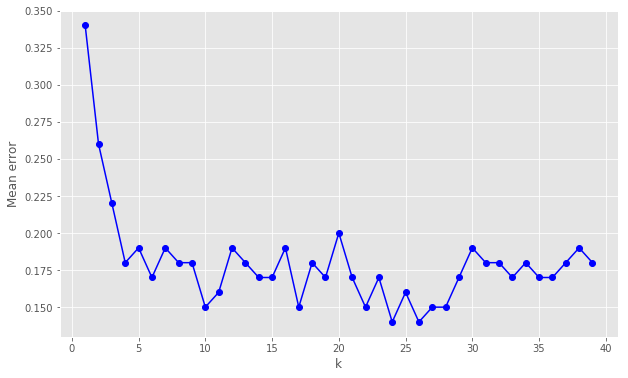

In [43]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='-', marker='o')
plt.xlabel("k")
plt.ylabel("Mean error")

In [44]:
### Can also do this with cross validation an a grid search to choose k.
### Attention! Need to put into pipeline so that each train fold is scaled 
### and the test fold by the same fit params to avoid data leakage
### so work with X_train and X_test, not X_train_scaled and X_test_scaled

from sklearn.pipeline import Pipeline

knn_pipeline = Pipeline([
    ('col_transformer_scaler', col_transformer),
    ('knn', KNeighborsClassifier())
])

from sklearn.model_selection import GridSearchCV

knn_param_grid = {'knn__n_neighbors' : [i for i in range(1,40)]} 
grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, verbose=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV] knn__n_neighbors=1 ..............................................
[CV] .................. knn__n_neighbors=1, score=0.756, total=   0.0s
[CV] knn__n_neighbors=1 ..............................................
[CV] .................. knn__n_neighbors=1, score=0.707, total=   0.0s
[CV] knn__n_neighbors=1 ..............................................
[CV] .................. knn__n_neighbors=1, score=0.707, total=   0.0s
[CV] knn__n_neighbors=1 ..............................................
[CV] .................. knn__n_neighbors=1, score=0.625, total=   0.0s
[CV] knn__n_neighbors=1 ..............................................
[CV] .................. knn__n_neighbors=1, score=0.625, total=   0.0s
[CV] knn__n_neighbors=2 ..............................................
[CV] .................. knn__n_neighbors=2, score=0.732, total=   0.0s
[CV] knn__n_neighbors=2 ..............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. knn__n_neighbors=5, score=0.756, total=   0.0s
[CV] knn__n_neighbors=5 ..............................................
[CV] .................. knn__n_neighbors=5, score=0.780, total=   0.0s
[CV] knn__n_neighbors=5 ..............................................
[CV] .................. knn__n_neighbors=5, score=0.675, total=   0.0s
[CV] knn__n_neighbors=5 ..............................................
[CV] .................. knn__n_neighbors=5, score=0.825, total=   0.0s
[CV] knn__n_neighbors=6 ..............................................
[CV] .................. knn__n_neighbors=6, score=0.829, total=   0.0s
[CV] knn__n_neighbors=6 ..............................................
[CV] .................. knn__n_neighbors=6, score=0.732, total=   0.0s
[CV] knn__n_neighbors=6 ..............................................
[CV] .................. knn__n_neighbors=6, score=0.756, total=   0.0s
[CV] knn__n_neighbors=6 ..............................................
[CV] .

[CV] ................. knn__n_neighbors=18, score=0.732, total=   0.0s
[CV] knn__n_neighbors=18 .............................................
[CV] ................. knn__n_neighbors=18, score=0.700, total=   0.0s
[CV] knn__n_neighbors=18 .............................................
[CV] ................. knn__n_neighbors=18, score=0.875, total=   0.0s
[CV] knn__n_neighbors=19 .............................................
[CV] ................. knn__n_neighbors=19, score=0.805, total=   0.0s
[CV] knn__n_neighbors=19 .............................................
[CV] ................. knn__n_neighbors=19, score=0.732, total=   0.0s
[CV] knn__n_neighbors=19 .............................................
[CV] ................. knn__n_neighbors=19, score=0.732, total=   0.0s
[CV] knn__n_neighbors=19 .............................................
[CV] ................. knn__n_neighbors=19, score=0.700, total=   0.0s
[CV] knn__n_neighbors=19 .............................................
[CV] .

[CV] ................. knn__n_neighbors=30, score=0.725, total=   0.0s
[CV] knn__n_neighbors=30 .............................................
[CV] ................. knn__n_neighbors=30, score=0.875, total=   0.0s
[CV] knn__n_neighbors=31 .............................................
[CV] ................. knn__n_neighbors=31, score=0.805, total=   0.0s
[CV] knn__n_neighbors=31 .............................................
[CV] ................. knn__n_neighbors=31, score=0.756, total=   0.0s
[CV] knn__n_neighbors=31 .............................................
[CV] ................. knn__n_neighbors=31, score=0.707, total=   0.0s
[CV] knn__n_neighbors=31 .............................................
[CV] ................. knn__n_neighbors=31, score=0.725, total=   0.0s
[CV] knn__n_neighbors=31 .............................................
[CV] ................. knn__n_neighbors=31, score=0.875, total=   0.0s
[CV] knn__n_neighbors=32 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    1.9s finished
/home/robertv/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('col_transformer_scaler',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('scaler',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['age',
                                                

In [45]:
grid_search.best_params_

{'knn__n_neighbors': 11}

In [46]:
grid_search.best_score_

0.7783251231527094

In [47]:
knn_grid_scores = grid_search.cv_results_['mean_test_score']
print(knn_grid_scores)

[0.68472906 0.7044335  0.76847291 0.74876847 0.77339901 0.77339901
 0.76847291 0.77339901 0.77339901 0.75862069 0.77832512 0.76847291
 0.77832512 0.77339901 0.76847291 0.75369458 0.76847291 0.76847291
 0.76847291 0.75862069 0.7635468  0.74876847 0.7635468  0.74876847
 0.7635468  0.7635468  0.76847291 0.76847291 0.76847291 0.77832512
 0.77339901 0.7635468  0.76847291 0.76847291 0.77339901 0.77339901
 0.77339901 0.77339901 0.7635468 ]


Text(0, 0.5, 'Error = 1 - mean accuracy')

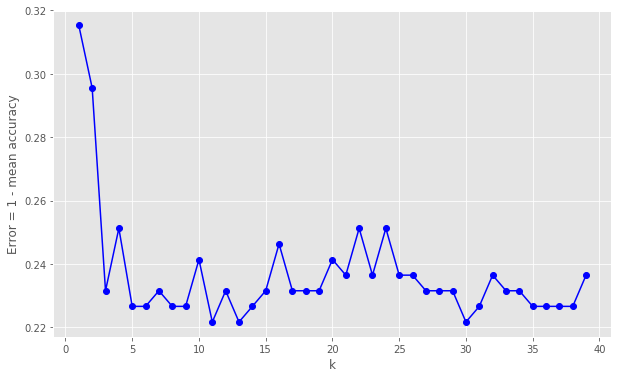

In [48]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(range(1,40), 1-knn_grid_scores, color='blue', linestyle='-', marker='o')
plt.xlabel("k")
plt.ylabel("Error = 1 - mean accuracy")

In [49]:
knn_predictions = grid_search.predict(X_test)

In [50]:
print(classification_report(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        52
           1       0.82      0.85      0.84        48

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

[[43  9]
 [ 7 41]]


## now try support vector classifier

In [52]:
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ('col_transformer_scaler', col_transformer),
    ('svc', SVC())
])

svc_param_grid = {'svc__C': [0.1, 1, 10, 100, 1000], 'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'svc__kernel': ['rbf']}

In [53]:
grid_search_svc = GridSearchCV(svc_pipeline, svc_param_grid, cv=5, verbose=3, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] svc__C=0.1, svc__gamma=1, svc__kernel=rbf .......................
[CV]  svc__C=0.1, svc__gamma=1, svc__kernel=rbf, score=0.561, total=   0.0s
[CV] svc__C=0.1, svc__gamma=1, svc__kernel=rbf .......................
[CV]  svc__C=0.1, svc__gamma=1, svc__kernel=rbf, score=0.561, total=   0.0s
[CV] svc__C=0.1, svc__gamma=1, svc__kernel=rbf .......................
[CV]  svc__C=0.1, svc__gamma=1, svc__kernel=rbf, score=0.561, total=   0.0s
[CV] svc__C=0.1, svc__gamma=1, svc__kernel=rbf .......................
[CV]  svc__C=0.1, svc__gamma=1, svc__kernel=rbf, score=0.550, total=   0.0s
[CV] svc__C=0.1, svc__gamma=1, svc__kernel=rbf .......................
[CV]  svc__C=0.1, svc__gamma=1, svc__kernel=rbf, score=0.550, total=   0.0s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf .....................
[CV]  svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf, score=0.780, total=   0.0s
[CV] svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf .....

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf, score=0.550, total=   0.0s
[CV] svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf ..................
[CV]  svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf, score=0.561, total=   0.0s
[CV] svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf ..................
[CV]  svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf, score=0.561, total=   0.0s
[CV] svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf ..................
[CV]  svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf, score=0.561, total=   0.0s
[CV] svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf ..................
[CV]  svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf, score=0.550, total=   0.0s
[CV] svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf ..................
[CV]  svc__C=0.1, svc__gamma=0.0001, svc__kernel=rbf, score=0.550, total=   0.0s
[CV] svc__C=1, svc__gamma=1, svc__kernel=rbf .........................
[CV]  svc__C=1, svc__gamma=1, svc__kernel=rbf, score=0.610, total=   0.0s
[CV] svc__C=1, 

[CV]  svc__C=100, svc__gamma=0.001, svc__kernel=rbf, score=0.829, total=   0.0s
[CV] svc__C=100, svc__gamma=0.001, svc__kernel=rbf ...................
[CV]  svc__C=100, svc__gamma=0.001, svc__kernel=rbf, score=0.854, total=   0.0s
[CV] svc__C=100, svc__gamma=0.001, svc__kernel=rbf ...................
[CV]  svc__C=100, svc__gamma=0.001, svc__kernel=rbf, score=0.780, total=   0.0s
[CV] svc__C=100, svc__gamma=0.001, svc__kernel=rbf ...................
[CV]  svc__C=100, svc__gamma=0.001, svc__kernel=rbf, score=0.725, total=   0.0s
[CV] svc__C=100, svc__gamma=0.001, svc__kernel=rbf ...................
[CV]  svc__C=100, svc__gamma=0.001, svc__kernel=rbf, score=0.925, total=   0.0s
[CV] svc__C=100, svc__gamma=0.0001, svc__kernel=rbf ..................
[CV]  svc__C=100, svc__gamma=0.0001, svc__kernel=rbf, score=0.854, total=   0.0s
[CV] svc__C=100, svc__gamma=0.0001, svc__kernel=rbf ..................
[CV]  svc__C=100, svc__gamma=0.0001, svc__kernel=rbf, score=0.756, total=   0.0s
[CV] svc__C=

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.2s finished
/home/robertv/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('col_transformer_scaler',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('scaler',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['age',
                                                

In [56]:
grid_search_svc.best_params_

{'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

In [57]:
grid_search_svc.best_score_

0.8226600985221675

In [59]:
svc_grid_scores = grid_search_svc.cv_results_['mean_test_score']
print(svc_grid_scores)

[0.55665025 0.75369458 0.55665025 0.55665025 0.55665025 0.61083744
 0.80295567 0.78325123 0.55665025 0.55665025 0.63054187 0.71921182
 0.81280788 0.79310345 0.55665025 0.63054187 0.71428571 0.80295567
 0.8226601  0.79310345 0.63054187 0.71428571 0.74384236 0.80788177
 0.8226601 ]


In [61]:
svc_predictions = grid_search_svc.predict(X_test)

In [62]:
print(classification_report(y_test, svc_predictions))
print(confusion_matrix(y_test, svc_predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        52
           1       0.83      0.83      0.83        48

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

[[44  8]
 [ 8 40]]


## now try neural network

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [176]:
print(final_df.shape)

NN_model = Sequential()
NN_model.add(Dense(23, activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(Dense(12, activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(Dense(1, activation='sigmoid'))

NN_model.compile(loss='binary_crossentropy', optimizer='adam')

(303, 23)


In [177]:
from sklearn.preprocessing import MinMaxScaler

In [178]:
col_transformer_NN = ColumnTransformer([
    ('minmaxscaler', MinMaxScaler(), ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
    ], remainder='passthrough')

In [179]:
col_transformer_NN.fit(X_train)
X_train_scaled_NN = col_transformer_NN.transform(X_train)
X_test_scaled_NN  = col_transformer_NN.transform(X_test)

In [180]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [181]:
NN_model.fit(x=X_train_scaled_NN, y=y_train.values, epochs=600,
             validation_data=(X_test_scaled_NN, y_test),
             callbacks=[early_stop]
            )


Epoch 1/600
7/7 [==============================] - 0s 13ms/step - loss: 0.7817 - val_loss: 0.6750
Epoch 2/600
7/7 [==============================] - 0s 5ms/step - loss: 0.7659 - val_loss: 0.6610
Epoch 3/600
7/7 [==============================] - 0s 5ms/step - loss: 0.7429 - val_loss: 0.6511
Epoch 4/600
7/7 [==============================] - 0s 6ms/step - loss: 0.7009 - val_loss: 0.6419
Epoch 5/600
7/7 [==============================] - 0s 5ms/step - loss: 0.6737 - val_loss: 0.6321
Epoch 6/600
7/7 [==============================] - 0s 5ms/step - loss: 0.6836 - val_loss: 0.6233
Epoch 7/600
7/7 [==============================] - 0s 6ms/step - loss: 0.6923 - val_loss: 0.6152
Epoch 8/600
7/7 [==============================] - 0s 7ms/step - loss: 0.6751 - val_loss: 0.6077
Epoch 9/600
7/7 [==============================] - 0s 5ms/step - loss: 0.6493 - val_loss: 0.6001
Epoch 10/600
7/7 [==============================] - 0s 5ms/step - loss: 0.6588 - val_loss: 0.5927
Epoch 11/600
7/7 [==========

7/7 [==============================] - 0s 5ms/step - loss: 0.4083 - val_loss: 0.3489
Epoch 85/600
7/7 [==============================] - 0s 5ms/step - loss: 0.4400 - val_loss: 0.3495
Epoch 86/600
7/7 [==============================] - 0s 5ms/step - loss: 0.4200 - val_loss: 0.3493
Epoch 87/600
7/7 [==============================] - 0s 5ms/step - loss: 0.4395 - val_loss: 0.3487
Epoch 88/600
7/7 [==============================] - 0s 5ms/step - loss: 0.4534 - val_loss: 0.3493
Epoch 89/600
7/7 [==============================] - 0s 5ms/step - loss: 0.4182 - val_loss: 0.3501
Epoch 90/600
7/7 [==============================] - 0s 5ms/step - loss: 0.4285 - val_loss: 0.3511
Epoch 91/600
7/7 [==============================] - 0s 5ms/step - loss: 0.3849 - val_loss: 0.3496
Epoch 92/600
7/7 [==============================] - 0s 6ms/step - loss: 0.4324 - val_loss: 0.3483
Epoch 93/600
7/7 [==============================] - 0s 6ms/step - loss: 0.3890 - val_loss: 0.3493
Epoch 94/600
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 0.3351 - val_loss: 0.3443
Epoch 168/600
7/7 [==============================] - 0s 5ms/step - loss: 0.3329 - val_loss: 0.3431
Epoch 169/600
7/7 [==============================] - 0s 5ms/step - loss: 0.2814 - val_loss: 0.3412
Epoch 170/600
7/7 [==============================] - 0s 5ms/step - loss: 0.2953 - val_loss: 0.3407
Epoch 171/600
7/7 [==============================] - 0s 5ms/step - loss: 0.3054 - val_loss: 0.3408
Epoch 172/600
7/7 [==============================] - 0s 5ms/step - loss: 0.3354 - val_loss: 0.3407
Epoch 173/600
7/7 [==============================] - 0s 5ms/step - loss: 0.2927 - val_loss: 0.3421
Epoch 174/600
7/7 [==============================] - 0s 5ms/step - loss: 0.3234 - val_loss: 0.3421
Epoch 175/600
7/7 [==============================] - 0s 5ms/step - loss: 0.3102 - val_loss: 0.3418
Epoch 00175: early stopping


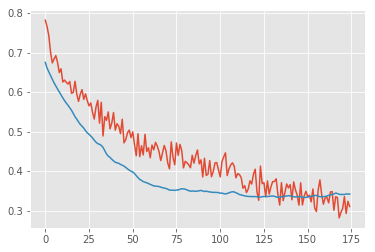

In [182]:
NN_model_loss = pd.DataFrame(NN_model.history.history)
plt.plot(NN_model_loss)

In [183]:
NN_predictions = NN_model.predict_classes(X_test_scaled)
print(NN_predictions.reshape(-1))

[1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0]


In [184]:
print(classification_report(y_test, NN_predictions.reshape(-1)))
print(confusion_matrix(y_test, NN_predictions.reshape(-1)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        52
           1       0.90      0.79      0.84        48

    accuracy                           0.86       100
   macro avg       0.87      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100

[[48  4]
 [10 38]]
